Pre-processing Round 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [6]:
df[df["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [7]:
df[df["clean_comment"].isna()]["category"].value_counts()

,count
category,
0,100


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df[df["clean_comment"].str.strip() == ""]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [13]:
df = df[~(df["clean_comment"].str.strip() == "")]

In [14]:
df["clean_commnet"] = df["clean_comment"].str.lower()

In [15]:
df.head()

,clean_comment,category,clean_commnet
0,family mormon have never tried explain them t...,1,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...


In [17]:
df[df["clean_comment"].apply(lambda x: x.endswith(" ") or x.startswith(" "))]

,clean_comment,category,clean_commnet
0,family mormon have never tried explain them t...,1,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...
...,...,...,...
37241,let the janta decide not ulema clerics,0,let the janta decide not ulema clerics
37242,hona hai same with vaccination education insu...,0,hona hai same with vaccination education insu...
37246,downvote karna tha par upvote hogaya,0,downvote karna tha par upvote hogaya
37247,haha nice,1,haha nice


In [18]:
df["clean_comment"] = df["clean_comment"].str.strip()

In [19]:
df["clean_comment"].apply(lambda x: x.endswith(" ") or x.startswith(" ")).sum()

np.int64(0)

In [20]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()


,clean_comment,category,clean_commnet


In [22]:
comments_with_newline = df[df["clean_comment"].str.contains("\n")]
comments_with_newline.head()

,clean_comment,category,clean_commnet
448,what missing jpg\nand why this brilliant edit ...,1,what missing jpg\nand why this brilliant edit ...
781,india has been ruined congress and populist sc...,-1,india has been ruined congress and populist s...
847,like aap for its stand corruption and making p...,-1,like aap for its stand corruption and making ...
871,reduced trade\ndeficit stronger rupee aren the...,0,reduced trade\ndeficit stronger rupee aren th...
1354,amsa press conference australian maritime safe...,1,amsa press conference australian maritime safe...


In [24]:
df["clean_comment"] = df["clean_comment"].str.replace("\n"," ",regex=True)
comments_with_newline_rem = df[df["clean_comment"].str.contains("\n")]
comments_with_newline_rem

,clean_comment,category,clean_commnet


EDA Round 1

<Axes: xlabel='category', ylabel='count'>

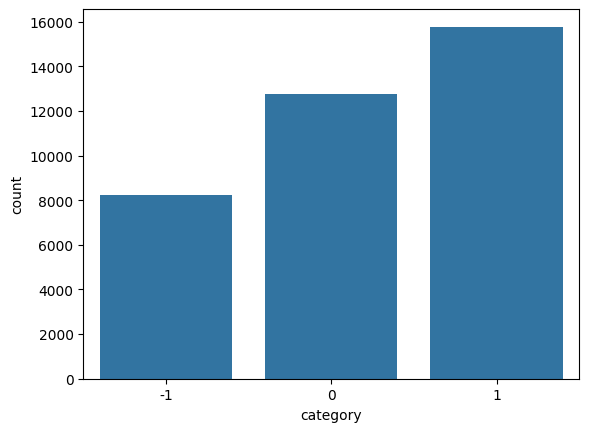

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x="category")

In [27]:
df["category"].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42
